In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-janatahack-healthcare-hackathon-ii/Data/train.csv
/kaggle/input/av-janatahack-healthcare-hackathon-ii/Data/sample_submission_lfbv3c3.csv
/kaggle/input/av-janatahack-healthcare-hackathon-ii/Data/train_data_dict.csv
/kaggle/input/av-janatahack-healthcare-hackathon-ii/Data/test.csv


In [2]:
df_train=pd.read_csv("../input/av-janatahack-healthcare-hackathon-ii/Data/train.csv")
df_test=pd.read_csv("../input/av-janatahack-healthcare-hackathon-ii/Data/test.csv")

In [3]:
df_train.head(30)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [4]:
df_train.shape

(318438, 18)

In [5]:
df_test.shape

(137057, 17)

In [6]:
df_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [7]:
df_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [9]:
df_train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
df_train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [11]:
#Data visualisation

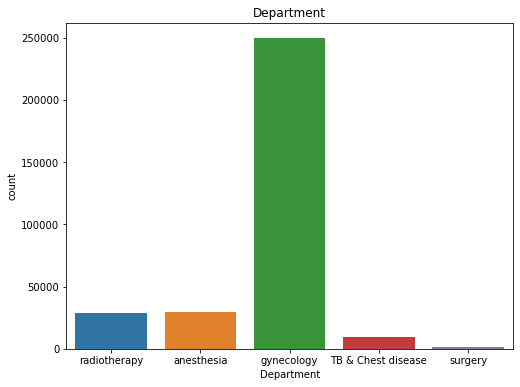

In [12]:
plt.figure(figsize=(8,6))
plt.title('Department')
sns.countplot(df_train['Department'])

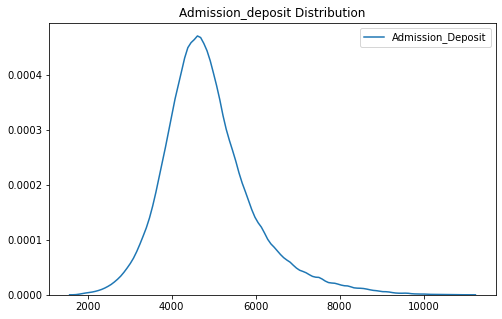

In [13]:
plt.figure(figsize=(8,5))
plt.title('Admission_deposit Distribution')
sns.kdeplot(data=df_train["Admission_Deposit"])

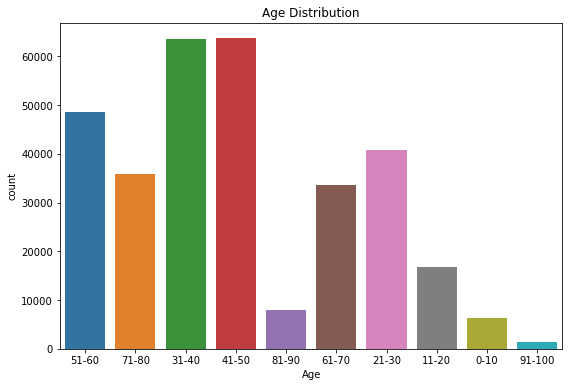

In [14]:
plt.figure(figsize=(9,6))
plt.title('Age Distribution')
sns.countplot(df_train['Age'])

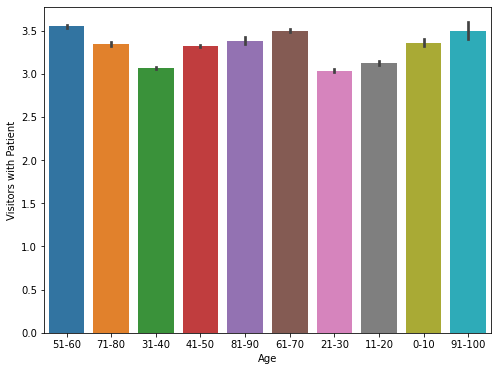

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_train["Age"],y=df_train["Visitors with Patient"])

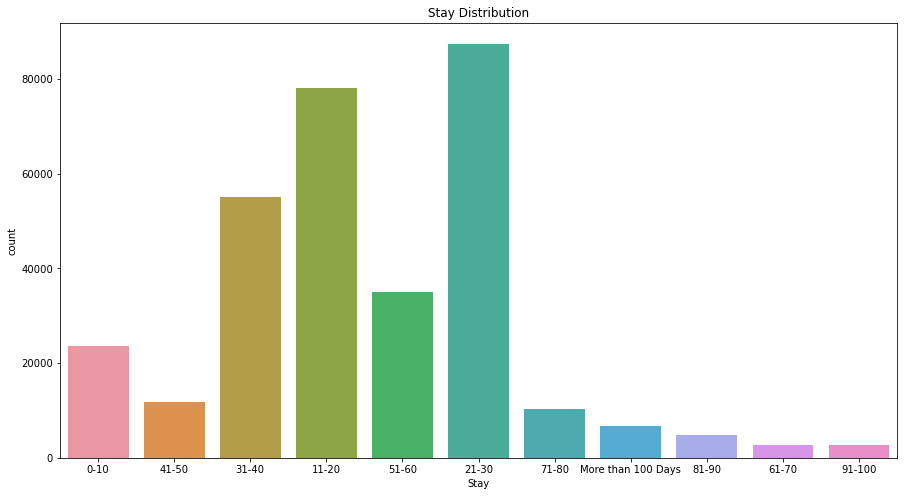

In [16]:
plt.figure(figsize=(15,8))
plt.title('Stay Distribution')
sns.countplot(df_train['Stay'])

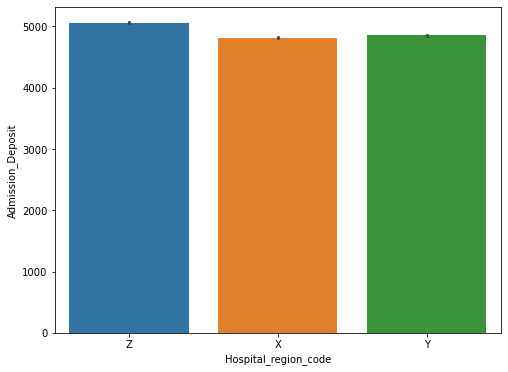

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_train["Hospital_region_code"],y=df_train["Admission_Deposit"])

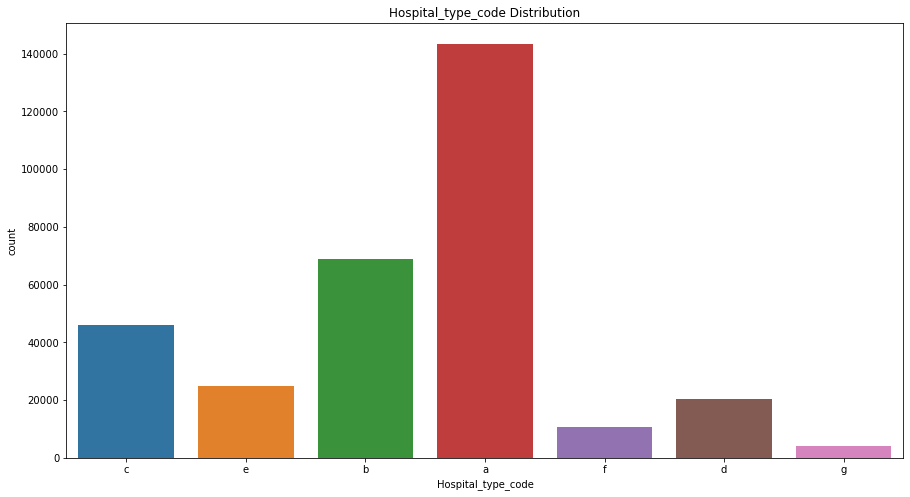

In [18]:
plt.figure(figsize=(15,8))
plt.title('Hospital_type_code Distribution')
sns.countplot(df_train['Hospital_type_code'])

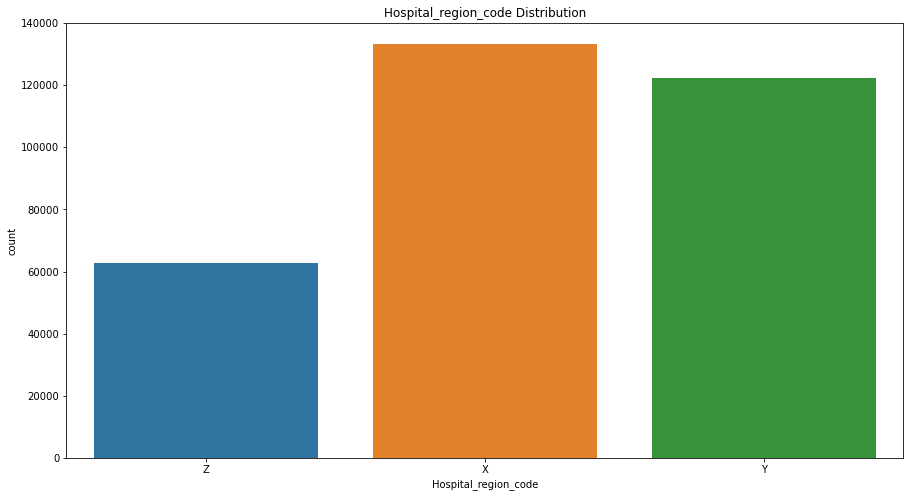

In [19]:
plt.figure(figsize=(15,8))
plt.title('Hospital_region_code Distribution')
sns.countplot(df_train['Hospital_region_code'])

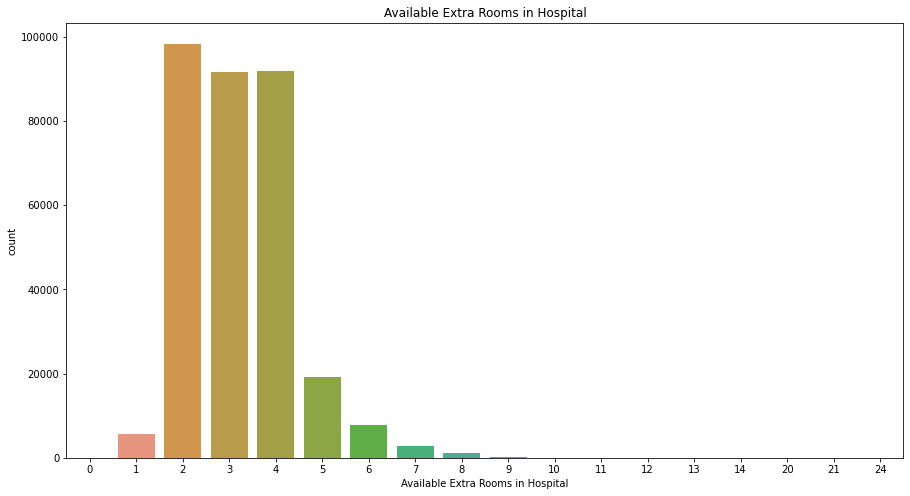

In [20]:
plt.figure(figsize=(15,8))
plt.title('Available Extra Rooms in Hospital')
sns.countplot(df_train['Available Extra Rooms in Hospital'])

In [21]:
df_train["Available Extra Rooms in Hospital"].unique()

array([ 3,  2,  1,  4,  6,  5,  7,  8,  9, 10, 12,  0, 11, 20, 14, 21, 13,
       24])

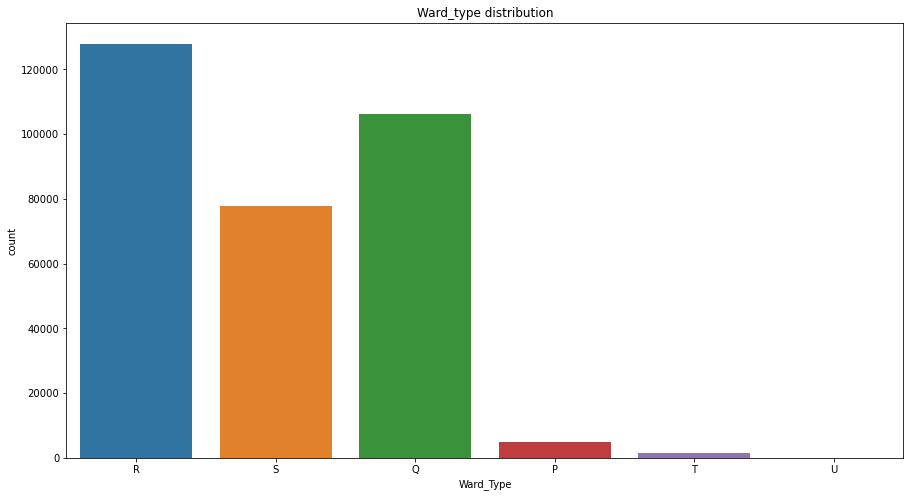

In [22]:
plt.figure(figsize=(15,8))
plt.title('Ward_type distribution')
sns.countplot(df_train['Ward_Type'])

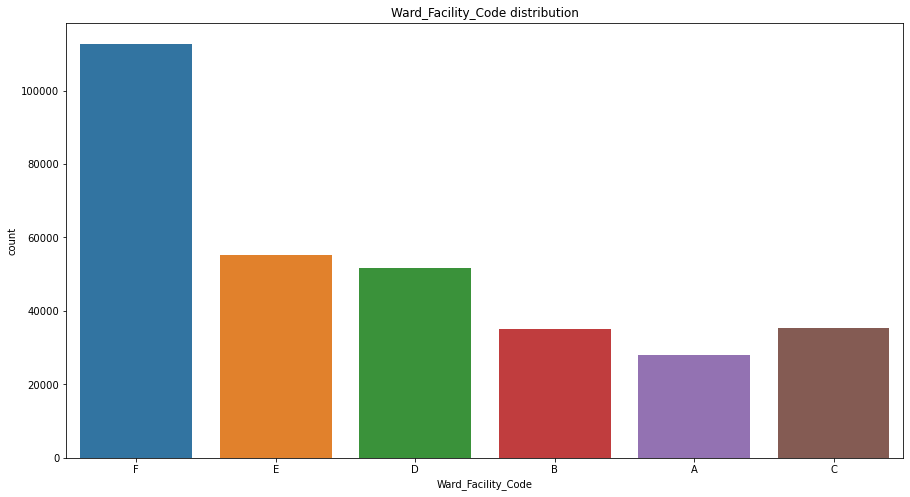

In [23]:
plt.figure(figsize=(15,8))
plt.title('Ward_Facility_Code distribution')
sns.countplot(df_train['Ward_Facility_Code'])

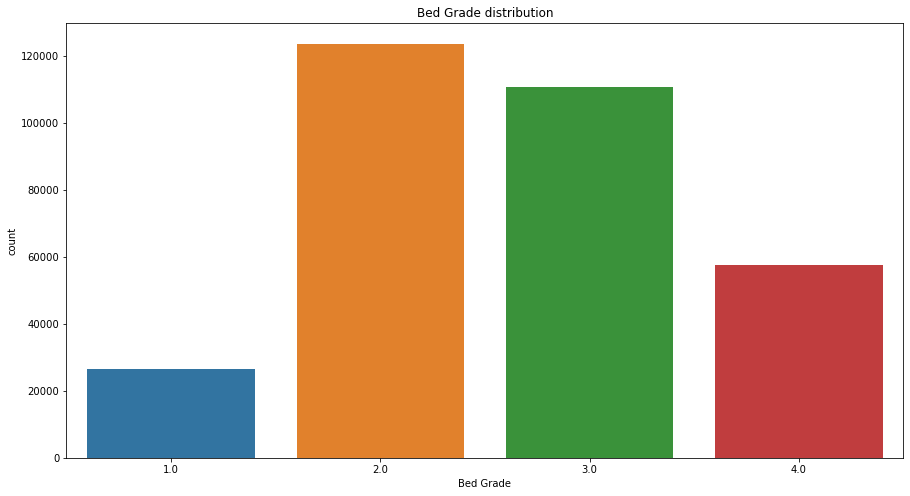

In [24]:
plt.figure(figsize=(15,8))
plt.title('Bed Grade distribution')
sns.countplot(df_train['Bed Grade'])

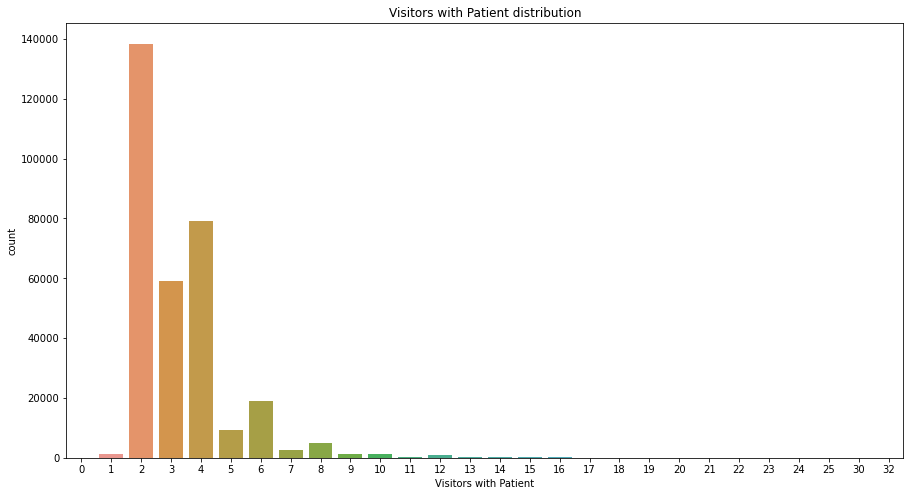

In [25]:
plt.figure(figsize=(15,8))
plt.title('Visitors with Patient distribution')
sns.countplot(df_train['Visitors with Patient'])

In [26]:
df_train["Visitors with Patient"].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25])

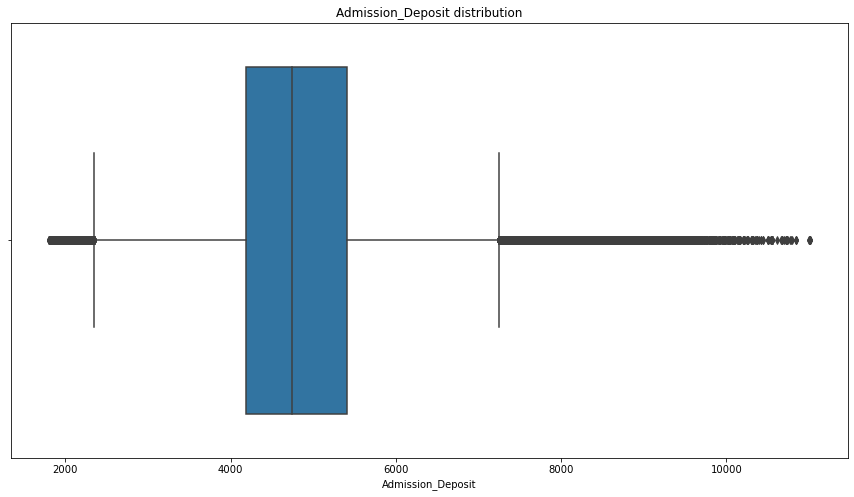

In [27]:
plt.figure(figsize=(15,8))
plt.title('Admission_Deposit distribution')
sns.boxplot(df_train['Admission_Deposit'])

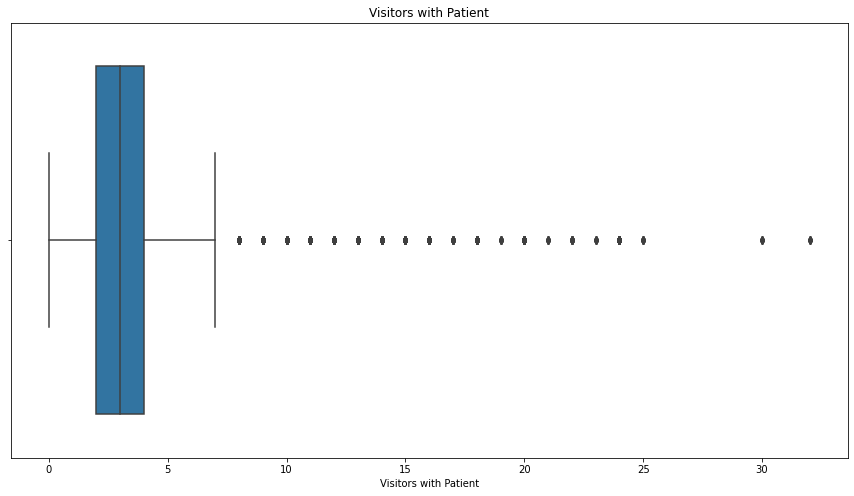

In [28]:
plt.figure(figsize=(15,8))
plt.title('Visitors with Patient')
sns.boxplot(df_train['Visitors with Patient'])

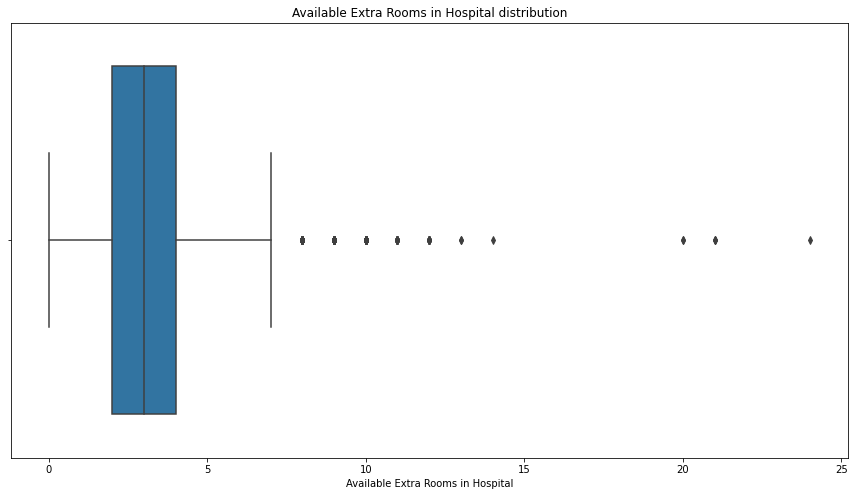

In [29]:
plt.figure(figsize=(15,8))
plt.title('Available Extra Rooms in Hospital distribution')
sns.boxplot(df_train['Available Extra Rooms in Hospital'])

In [30]:
age=df_train.groupby("Age")

In [31]:
age.describe()

case_id                                                            \
          count           mean           std     min        25%       50%   
Age                                                                         
0-10     6254.0  210354.351455  91097.381821   501.0  142396.25  240302.5   
11-20   16768.0  188837.562321  92795.461357   130.0  117914.75  203452.0   
21-30   40843.0  169512.081948  92424.196514    88.0   91019.50  174541.0   
31-40   63639.0  157503.728154  91392.123690    26.0   78462.50  156445.0   
41-50   63749.0  157766.662646  90948.903655    32.0   78622.00  156923.0   
51-60   48514.0  157296.126706  89871.766671     1.0   81955.25  154617.5   
61-70   33687.0  151794.770564  90654.266680    74.0   74250.50  149250.0   
71-80   35792.0  144543.076721  90948.225916    15.0   61718.75  141845.5   
81-90    7890.0  139254.124588  88371.816439    61.0   60634.25  138402.0   
91-100   1302.0  152496.554531  95576.774043  1249.0   70898.25  154948.5   

                            Hospital_code             ...  \
              75%       max         count       mean  ...   
Age                                                   ...   
0-10    286501.75  318427.0        6254.0  17.850016  ...   
11-20   270820.25  318438.0       16768.0  18.167521  ...   
21-30   251318.50  318418.0       40843.0  18.164875  ...   
31-40   235379.00  318424.0       63639.0  18.240010  ...   
41-50   235058.00  318434.0       63749.0  18.282106  ...   
51-60   233981.75  318430.0       48514.0  18.370532  ...   
61-70   227475.50  318414.0       33687.0  18.551667  ...   
71-80   218174.25  318436.0       35792.0  18.478906  ...   
81-90   209871.75  318435.0        7890.0  18.661217  ...   
91-100  241223.75  318415.0        1302.0  18.576037  ...   

       Visitors with Patient       Admission_Deposit               \
                         75%   max             count         mean   
Age                                                                 
0-10                     4.0  24.0            6254.0  4952.145347   
11-20                    4.0  16.0           16768.0  4954.052421   
21-30                    4.0  24.0           40843.0  4867.127292   
31-40                    4.0  24.0           63639.0  4821.516696   
41-50                    4.0  24.0           63749.0  4815.580229   
51-60                    4.0  32.0           48514.0  4888.343159   
61-70                    4.0  25.0           33687.0  4964.719387   
71-80                    4.0  32.0           35792.0  4976.781208   
81-90                    4.0  32.0            7890.0  4897.391635   
91-100                   4.0  15.0            1302.0  4910.788786   

                                                                
                std     min      25%     50%      75%      max  
Age                                                             
0-10    1167.734569  1831.0  4187.00  4816.0  5532.00  11008.0  
11-20   1119.084799  1807.0  4250.00  4813.0  5495.00  10728.0  
21-30   1070.947082  1810.0  4191.00  4737.0  5374.00  10842.0  
31-40   1069.209424  1800.0  4154.00  4682.0  5329.00  10999.0  
41-50   1086.222148  1801.0  4126.00  4665.0  5334.00  10999.0  
51-60   1100.107738  1811.0  4173.00  4737.0  5436.00  11008.0  
61-70   1097.419472  1809.0  4258.00  4820.0  5509.00  11008.0  
71-80   1070.936170  1805.0  4283.00  4857.0  5516.00  11008.0  
81-90   1039.547063  1813.0  4208.25  4796.0  5419.75  10314.0  
91-100  1147.671385  1874.0  4155.00  4755.5  5503.00  10553.0  

[10 rows x 72 columns]

In [32]:
#Handling missing values

In [33]:
df_train['is_train'] = 1
df_test['is_train'] = 0

In [34]:
df_total=pd.concat([df_train,df_test])

In [35]:
df_total.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
is_train                                  0
dtype: int64

In [36]:
df_total.City_Code_Patient.head(20)

0     7.0
1     7.0
2     7.0
3     7.0
4     7.0
5     7.0
6     7.0
7     7.0
8     7.0
9     7.0
10    7.0
11    7.0
12    7.0
13    7.0
14    8.0
15    8.0
16    8.0
17    8.0
18    8.0
19    8.0
Name: City_Code_Patient, dtype: float64

In [37]:
df_total.City_Code_Patient=df_total.City_Code_Patient.fillna(method="ffill",axis=0)

In [38]:
df_total["Bed Grade"].head(20)

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
5     2.0
6     3.0
7     3.0
8     4.0
9     3.0
10    2.0
11    1.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    2.0
19    2.0
Name: Bed Grade, dtype: float64

In [39]:
df_total["Bed Grade"]=df_total["Bed Grade"].fillna(0)

In [40]:
df_total.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                 0
patientid                                 0
City_Code_Patient                         0
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
is_train                                  0
dtype: int64

In [41]:
df_total

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,is_train
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,0


In [42]:
#Binning

In [43]:
#Feature generation

In [44]:
#df_total['Bill_per_patient'] = df_total.groupby('patientid')['Admission_Deposit'].transform('sum')

In [45]:
df_total

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,is_train
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,0


In [46]:
#Scaling 

In [47]:
from sklearn import preprocessing

In [48]:
df_total["Admission_Deposit"]

0         4911.0
1         5954.0
2         4745.0
3         7272.0
4         5558.0
           ...  
137052    6313.0
137053    3510.0
137054    7190.0
137055    5435.0
137056    4702.0
Name: Admission_Deposit, Length: 455495, dtype: float64

In [49]:
scaler=preprocessing.MinMaxScaler()
df_total["Admission_Deposit"]=scaler.fit_transform(df_total[["Admission_Deposit"]])

In [50]:
df_total["Admission_Deposit"]

0         0.307411
1         0.410474
2         0.291008
3         0.540711
4         0.371344
            ...   
137052    0.445949
137053    0.168972
137054    0.532609
137055    0.359190
137056    0.286759
Name: Admission_Deposit, Length: 455495, dtype: float64

In [51]:
#Handling categorical variables

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
la=LabelEncoder()

In [54]:
df_total["Hospital_region_code"] =la.fit_transform(df_total["Hospital_region_code"])
df_total["Department"] = la.fit_transform(df_total["Department"])
df_total["Ward_Type"] = la.fit_transform(df_total["Ward_Type"])
df_total["Ward_Facility_Code"] = la.fit_transform(df_total["Ward_Facility_Code"])
df_total["Type of Admission"] = la.fit_transform(df_total["Type of Admission"])
df_total["Severity of Illness"] = la.fit_transform(df_total["Severity of Illness"])
df_total["Hospital_type_code"]= la.fit_transform(df_total["Hospital_type_code"])
df_total["Age"] = la.fit_transform(df_total["Age"])

In [55]:
#df_total = pd.get_dummies(df_total, columns=["Hospital_region_code"])
#df_total = pd.get_dummies(df_total, columns=["Department"])
#df_total = pd.get_dummies(df_total, columns=["Ward_Type"])
#df_total = pd.get_dummies(df_total, columns=["Ward_Facility_Code"])
#df_total = pd.get_dummies(df_total, columns=["City_Code_Patient"])
#df_total = pd.get_dummies(df_total, columns=["Type of Admission"])
#df_total = pd.get_dummies(df_total, columns=["Severity of Illness"])
#df_total = pd.get_dummies(df_total, columns=["Hospital_type_code"])
#df_total = pd.get_dummies(df_total, columns=["Bed Grade"])
#df_total = pd.get_dummies(df_total, columns=["City_Code_Hospital"])
#df_total = pd.get_dummies(df_total, columns=["Available Extra Rooms in Hospital"])
#df_total = pd.get_dummies(df_total, columns=["Age"])
#df_total = pd.get_dummies(df_total, columns=["Hospital_code"])
#df_total = pd.get_dummies(df_total, columns=["Visitors with Patient"])

In [56]:
#Unmerging train and test data 

In [57]:
df_train_final = df_total[df_total['is_train']==1]
df_test_final = df_total[df_total['is_train']== 0]

In [58]:
df_train_final["Stay"] = la.fit_transform(df_train_final["Stay"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
#Handling outliers

In [60]:
#Deploying the model

In [61]:
x=df_train_final.drop(["Stay","case_id","patientid","is_train"],axis="columns")
y=df_train_final.Stay

In [62]:
x_test=df_test_final.drop(["Stay","case_id","patientid","is_train"],axis="columns")
y_test=df_test_final.Stay

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2)

In [64]:
#from sklearn.svm import SVC

In [65]:
#sv=SVC(C=1,kernel='poly',gamma='auto',degree=3)
#sv.fit(x,y)

In [66]:
#import lightgbm as lgb
#import optuna

In [67]:
#def objective(trail):
    
#    dtrain=lgb.Dataset(x_train,label=np.ravel(y_train))
    
 #   param={
        
#        "verbosity": -1,
 #       "boosting_type": "gbdt",
  #      "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
   #     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
    #    "num_leaves": trial.suggest_int("num_leaves", 2, 256),
     #   "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
      #  "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
       # "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        #"min_child_samples": trial.suggest_int("min_child_samples", 5, 100)
#    }
 #   
  #  gbm=lgb.train(param,dtrain)
   # preds=gbm.predict(x_valid)
    #pred_labels=np.rint(preds)
    #accuracy=sklearn.metrics.accuracy_score(y_valid,pred_labels)
    #return accuracy

In [68]:
#opt_GS=optuna.create_study(direction="maximise")
#opt_GS.optimize(objective,n_trails=250)

#print("Number of finished trials: {}".format(len(opt_GS.trails)))

#print("Best_trail:")
#trail=opt_GS.best_trial

#print("Value: {}".format(trial.value)
      
#print("Params: ")
#for key, value in trial.params.items():
#    print("{}: {}".format(key, value))

In [69]:
import xgboost as xgb
import optuna 
import sklearn.metrics

In [70]:
def objective(trial):
    dtrain = xgb.DMatrix(x_train, label=np.ravel(y_train))
    dvalid = xgb.DMatrix(x_valid, label=np.ravel(y_valid))

    param = {
#        "silent": 1,
#        "objective": "binary:logistic",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_valid, pred_labels)
    return accuracy



study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2020-09-08 13:14:50,286] Trial 0 finished with value: 0.24750345433990706 and parameters: {'booster': 'dart', 'lambda': 6.50487728962526e-08, 'alpha': 0.0005032628064963953, 'max_depth': 2, 'eta': 0.0008049074802627546, 'gamma': 2.5314907769589294e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.12838309304191234, 'skip_drop': 4.002504482993155e-05}. Best is trial 0 with value: 0.24750345433990706.
[I 2020-09-08 13:14:50,937] Trial 1 finished with value: 0.2570185906293179 and parameters: {'booster': 'gblinear', 'lambda': 5.9549602841733654e-05, 'alpha': 4.918462078648084e-07}. Best is trial 1 with value: 0.2570185906293179.
[I 2020-09-08 13:14:51,598] Trial 2 finished with value: 0.26221580203492023 and parameters: {'booster': 'gblinear', 'lambda': 1.1776210120397094e-07, 'alpha': 0.18535186899867567}. Best is trial 2 with value: 0.26221580203492023.
[I 2020-09-08 13:14:54,691] Trial 3 finished with value: 0.24750345433990706 and

[I 2020-09-08 13:15:29,667] Trial 24 finished with value: 0.32707888456224093 and parameters: {'booster': 'gbtree', 'lambda': 0.14740140150595005, 'alpha': 0.0001546909884514661, 'max_depth': 7, 'eta': 0.7761094325752524, 'gamma': 1.5087148818774153e-06, 'grow_policy': 'depthwise'}. Best is trial 24 with value: 0.32707888456224093.
[I 2020-09-08 13:15:32,033] Trial 25 finished with value: 0.24930913201859062 and parameters: {'booster': 'gbtree', 'lambda': 0.06022654443450716, 'alpha': 0.00012458819281505076, 'max_depth': 7, 'eta': 0.02262641012888598, 'gamma': 4.119472333528445e-06, 'grow_policy': 'depthwise'}. Best is trial 24 with value: 0.32707888456224093.
[I 2020-09-08 13:15:34,165] Trial 26 finished with value: 0.33051752292425574 and parameters: {'booster': 'gbtree', 'lambda': 0.19998826729841238, 'alpha': 0.0008281156318525566, 'max_depth': 7, 'eta': 0.9058054390078271, 'gamma': 5.3896300888676496e-05, 'grow_policy': 'depthwise'}. Best is trial 26 with value: 0.3305175229242557

[I 2020-09-08 13:16:25,145] Trial 43 finished with value: 0.34232508478834317 and parameters: {'booster': 'dart', 'lambda': 3.6590288484763015e-08, 'alpha': 0.1066270359408313, 'max_depth': 8, 'eta': 0.0921752804015201, 'gamma': 0.00011364368804548586, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0009212733429295499, 'skip_drop': 0.0004621694612208076}. Best is trial 31 with value: 0.3565349830423314.
[I 2020-09-08 13:16:28,195] Trial 44 finished with value: 0.24750345433990706 and parameters: {'booster': 'dart', 'lambda': 4.4075878624735355e-08, 'alpha': 0.13179221432649446, 'max_depth': 8, 'eta': 0.01013393165881151, 'gamma': 0.017714816010593423, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0006733320121315827, 'skip_drop': 0.00011179508869149649}. Best is trial 31 with value: 0.3565349830423314.
[I 2020-09-08 13:16:30,643] Trial 45 finished with value: 0.31685717874638863 and par

[I 2020-09-08 13:17:10,049] Trial 61 finished with value: 0.3586075869865595 and parameters: {'booster': 'dart', 'lambda': 7.66313442292589e-08, 'alpha': 0.1354461623251938, 'max_depth': 8, 'eta': 0.11599715392297177, 'gamma': 0.39105927258400125, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0013107663595691103, 'skip_drop': 0.0008735231538296994}. Best is trial 61 with value: 0.3586075869865595.
[I 2020-09-08 13:17:12,402] Trial 62 finished with value: 0.2481943223213164 and parameters: {'booster': 'dart', 'lambda': 6.942798878076731e-08, 'alpha': 0.21324575363056092, 'max_depth': 7, 'eta': 0.01757436737851783, 'gamma': 0.429242757218612, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.001610881372152575, 'skip_drop': 0.0011034732960455602}. Best is trial 61 with value: 0.3586075869865595.
[I 2020-09-08 13:17:14,771] Trial 63 finished with value: 0.23758007787966337 and parameters: {'b

[I 2020-09-08 13:18:00,679] Trial 79 finished with value: 0.23844366285642507 and parameters: {'booster': 'dart', 'lambda': 1.7439971889270917e-06, 'alpha': 0.00022562880920164134, 'max_depth': 6, 'eta': 0.056508614896988614, 'gamma': 1.2639895717029253e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.002126741330837118, 'skip_drop': 0.00235871476458803}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:18:01,345] Trial 80 finished with value: 0.25700288908428587 and parameters: {'booster': 'gblinear', 'lambda': 1.0231307396738088e-07, 'alpha': 0.0002753630444264709}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:18:04,105] Trial 81 finished with value: 0.35856048235146337 and parameters: {'booster': 'dart', 'lambda': 4.969811699059633e-08, 'alpha': 0.08495088995101889, 'max_depth': 8, 'eta': 0.1160676570652229, 'gamma': 5.906789136770202e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 

[I 2020-09-08 13:18:49,175] Trial 97 finished with value: 0.24750345433990706 and parameters: {'booster': 'dart', 'lambda': 1.0095431394096307e-08, 'alpha': 0.00018131608929041775, 'max_depth': 7, 'eta': 0.006493078738726604, 'gamma': 1.4976398685307882e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0005387462841364523, 'skip_drop': 2.0891705686189538e-05}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:18:50,430] Trial 98 finished with value: 0.30471988443662856 and parameters: {'booster': 'dart', 'lambda': 0.015424230310936404, 'alpha': 9.209333288377917e-06, 'max_depth': 3, 'eta': 0.0944149712411227, 'gamma': 2.640776640176072e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.8892396465792198e-08, 'skip_drop': 0.0011010175253679045}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:18:53,143] Trial 99 finished with value: 0.23958987564376336 

[I 2020-09-08 13:19:39,385] Trial 115 finished with value: 0.32684336138676046 and parameters: {'booster': 'dart', 'lambda': 8.500446435257578e-08, 'alpha': 0.10799515192645968, 'max_depth': 9, 'eta': 0.23786306555356795, 'gamma': 1.7200667543711095e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0001284502463210243, 'skip_drop': 0.0031852264897228866}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:19:42,194] Trial 116 finished with value: 0.3550904408993845 and parameters: {'booster': 'dart', 'lambda': 6.318712457445043e-08, 'alpha': 0.00032760549673903024, 'max_depth': 8, 'eta': 0.12078598446252953, 'gamma': 5.123710549431361e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.011949822565775583, 'skip_drop': 0.47378522930072403}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:19:44,421] Trial 117 finished with value: 0.3236716492902902 and pa

[I 2020-09-08 13:20:27,390] Trial 133 finished with value: 0.3317265418917221 and parameters: {'booster': 'dart', 'lambda': 5.651273618222104e-08, 'alpha': 0.0003326811149917563, 'max_depth': 8, 'eta': 0.08592761307786313, 'gamma': 5.094123707049365e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0012454827278243052, 'skip_drop': 0.0018913669631608874}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:20:30,667] Trial 134 finished with value: 0.3218973747016706 and parameters: {'booster': 'dart', 'lambda': 8.708027792755792e-08, 'alpha': 0.0002781843605836888, 'max_depth': 8, 'eta': 0.18214126815701384, 'gamma': 9.50943623459584e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0007659842226813902, 'skip_drop': 0.001145581468906373}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:20:33,411] Trial 135 finished with value: 0.23687350835322196 and p

[I 2020-09-08 13:21:16,423] Trial 151 finished with value: 0.35455658836829546 and parameters: {'booster': 'dart', 'lambda': 3.317136516924858e-08, 'alpha': 0.00023679457464642327, 'max_depth': 8, 'eta': 0.12155157468787547, 'gamma': 2.098750723611675e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 7.632447534898928e-05, 'skip_drop': 0.0005184639912460334}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:21:19,532] Trial 152 finished with value: 0.2844177867102123 and parameters: {'booster': 'dart', 'lambda': 2.261636993105266e-08, 'alpha': 0.0005870688589556799, 'max_depth': 8, 'eta': 0.07273049967656724, 'gamma': 9.587643403363122e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00025029342821820846, 'skip_drop': 0.00027136320583534497}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:21:22,468] Trial 153 finished with value: 0.35856048235146337

[I 2020-09-08 13:22:04,036] Trial 168 finished with value: 0.3302034920236151 and parameters: {'booster': 'dart', 'lambda': 1.5035092450538074e-08, 'alpha': 8.03673176444789e-05, 'max_depth': 9, 'eta': 0.272919185162948, 'gamma': 6.305281629133047e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 9.601617782045714e-05, 'skip_drop': 0.0014819764751226188}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:22:07,068] Trial 169 finished with value: 0.23963698027885943 and parameters: {'booster': 'dart', 'lambda': 7.946483656189235e-08, 'alpha': 0.0009753759317166893, 'max_depth': 8, 'eta': 0.03671906925271628, 'gamma': 1.2819289413871634e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0004558288375341789, 'skip_drop': 0.000511694073919137}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:22:09,857] Trial 170 finished with value: 0.32952832558723777 and 

[I 2020-09-08 13:22:56,502] Trial 186 finished with value: 0.32554013314910185 and parameters: {'booster': 'dart', 'lambda': 3.672909020642932e-08, 'alpha': 2.12396168976707e-05, 'max_depth': 8, 'eta': 0.2817524025628045, 'gamma': 4.939953700375318e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.000624013832766712, 'skip_drop': 0.000223961368225022}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:22:58,899] Trial 187 finished with value: 0.34730247456349705 and parameters: {'booster': 'dart', 'lambda': 7.351822145956731e-08, 'alpha': 0.00046006451162465106, 'max_depth': 7, 'eta': 0.09750466355327485, 'gamma': 2.5342192118328695e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.003097126710433505, 'skip_drop': 0.007588422395901316}. Best is trial 71 with value: 0.3588274086170079.
[I 2020-09-08 13:23:01,816] Trial 188 finished with value: 0.26609408365783194 and p

[I 2020-09-08 13:23:47,683] Trial 204 finished with value: 0.3534417786710212 and parameters: {'booster': 'dart', 'lambda': 1.7720755722081858e-08, 'alpha': 0.002222273483768058, 'max_depth': 8, 'eta': 0.09996761411377199, 'gamma': 0.0008769647655877418, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0009959458914505603, 'skip_drop': 0.00044064430986887597}. Best is trial 192 with value: 0.3592356487878407.
[I 2020-09-08 13:23:50,469] Trial 205 finished with value: 0.26300087928652177 and parameters: {'booster': 'dart', 'lambda': 2.8885561222513898e-08, 'alpha': 0.2889067273955047, 'max_depth': 8, 'eta': 0.06783208518841673, 'gamma': 0.06130034148229237, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00021934344136316633, 'skip_drop': 0.0012120838452763074}. Best is trial 192 with value: 0.3592356487878407.
[I 2020-09-08 13:23:53,260] Trial 206 finished with value: 0.327628438638362 and 

[I 2020-09-08 13:24:38,627] Trial 221 finished with value: 0.35692752166813213 and parameters: {'booster': 'dart', 'lambda': 2.6499212768654543e-08, 'alpha': 0.00023190932119831662, 'max_depth': 9, 'eta': 0.11950312302403802, 'gamma': 0.002127807105689584, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.5787534971659914e-05, 'skip_drop': 0.0005557557830426718}. Best is trial 192 with value: 0.3592356487878407.
[I 2020-09-08 13:24:41,990] Trial 222 finished with value: 0.35273520914457984 and parameters: {'booster': 'dart', 'lambda': 2.73660267678768e-08, 'alpha': 0.0001785760844982549, 'max_depth': 9, 'eta': 0.10096102632017641, 'gamma': 0.011242199867770922, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.2499329597528416e-05, 'skip_drop': 0.0005325893878402928}. Best is trial 192 with value: 0.3592356487878407.
[I 2020-09-08 13:24:45,477] Trial 223 finished with value: 0.3432828790352971

[I 2020-09-08 13:25:34,642] Trial 239 finished with value: 0.31461185780680817 and parameters: {'booster': 'dart', 'lambda': 0.006840997910502392, 'alpha': 5.972105502069954e-06, 'max_depth': 7, 'eta': 0.18591229975493004, 'gamma': 1.3238675064692237e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0005432526715369981, 'skip_drop': 0.0002941359990900625}. Best is trial 192 with value: 0.3592356487878407.
[I 2020-09-08 13:25:37,647] Trial 240 finished with value: 0.3597380982288657 and parameters: {'booster': 'dart', 'lambda': 0.00016789099826713906, 'alpha': 7.1055567960670365e-06, 'max_depth': 8, 'eta': 0.11184863635519846, 'gamma': 2.4571681544120996e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0008382843279824944, 'skip_drop': 0.000110350865189852}. Best is trial 240 with value: 0.3597380982288657.
[I 2020-09-08 13:25:40,548] Trial 241 finished with value: 0.3584505715362391

[I 2020-09-08 13:26:29,619] Trial 257 finished with value: 0.35673910312774776 and parameters: {'booster': 'dart', 'lambda': 9.014082395843023e-05, 'alpha': 0.0008539710245885375, 'max_depth': 8, 'eta': 0.11699640128682692, 'gamma': 0.0006878553398047039, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.08407828180826638, 'skip_drop': 0.0007021707319075283}. Best is trial 240 with value: 0.3597380982288657.
[I 2020-09-08 13:26:32,564] Trial 258 finished with value: 0.35782250973495794 and parameters: {'booster': 'dart', 'lambda': 0.0003254575290047917, 'alpha': 1.0076657611419952e-06, 'max_depth': 8, 'eta': 0.11446511322785004, 'gamma': 0.001756929794811066, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.09766727618597786, 'skip_drop': 0.0007005052886297665}. Best is trial 240 with value: 0.3597380982288657.
[I 2020-09-08 13:26:35,347] Trial 259 finished with value: 0.23980969727421178 and p

[I 2020-09-08 13:27:19,072] Trial 275 finished with value: 0.24750345433990706 and parameters: {'booster': 'dart', 'lambda': 4.4366500476902564e-06, 'alpha': 1.1610634489270663e-06, 'max_depth': 8, 'eta': 1.601172478825759e-05, 'gamma': 1.4255734888552034e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0018808585802944336, 'skip_drop': 0.0004894291558211111}. Best is trial 240 with value: 0.3597380982288657.
[I 2020-09-08 13:27:20,415] Trial 276 finished with value: 0.34524557216430096 and parameters: {'booster': 'dart', 'lambda': 0.00010322001727766268, 'alpha': 2.9022765642435466e-07, 'max_depth': 3, 'eta': 0.10306146753276152, 'gamma': 3.290452766505506e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0004467748966833128, 'skip_drop': 0.00017134047576227812}. Best is trial 240 with value: 0.3597380982288657.
[I 2020-09-08 13:27:23,654] Trial 277 finished with value: 0.321473432

[I 2020-09-08 13:28:07,726] Trial 293 finished with value: 0.3431415651300088 and parameters: {'booster': 'dart', 'lambda': 2.059714347563868e-05, 'alpha': 8.874435960694737e-08, 'max_depth': 8, 'eta': 0.09273355894514505, 'gamma': 0.007958301443861598, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00023125722585231034, 'skip_drop': 0.0006537377138278695}. Best is trial 240 with value: 0.3597380982288657.
[I 2020-09-08 13:28:11,128] Trial 294 finished with value: 0.330658836829544 and parameters: {'booster': 'dart', 'lambda': 0.0033788065553547035, 'alpha': 0.0006319307092790881, 'max_depth': 9, 'eta': 0.3087665387334263, 'gamma': 0.2955222502638408, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0008345574979011631, 'skip_drop': 2.733815486650749e-06}. Best is trial 240 with value: 0.3597380982288657.
[I 2020-09-08 13:28:13,953] Trial 295 finished with value: 0.34518276598417286 and pa

Number of finished trials: 300
Best trial:
  Value: 0.3597380982288657
  Params: 
    booster: dart
    lambda: 0.00016789099826713906
    alpha: 7.1055567960670365e-06
    max_depth: 8
    eta: 0.11184863635519846
    gamma: 2.4571681544120996e-06
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: forest
    rate_drop: 0.0008382843279824944
    skip_drop: 0.000110350865189852


In [71]:

xgb_clf = xgb.XGBClassifier(booster="gbtree",reg_lambda=3.873345576688548e-08,reg_alpha=0.00844791893600649,max_depth=9,
                           eta=0.11,gamma=0.05291265311735101,grow_policy="lossguide",sample_type="weighted",normalize_type="forest",
                           rate_drop=0.000422577972569911,skip_drop=1.8910304509839257e-07)

In [72]:
xgb_clf.fit(x, np.ravel(y))

[13:31:36] WARNING: ../src/learner.cc:516: 
Parameters: { normalize_type, rate_drop, sample_type, skip_drop } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.11,
              gamma=0.05291265311735101, gpu_id=-1, grow_policy='lossguide',
              importance_type='gain', interaction_constraints='',
              learning_rate=0.109999999, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, normalize_type='forest',
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              rate_drop=0.000422577972569911, reg_alpha=0.00844791893600649,
              reg_lambda=3.873345576688548e-08, sample_type='weighted',
              scale_pos_weight=None, skip_drop=1.8910304509839257e-07,
              subsample=1, ...)

In [73]:
y_pred = xgb_clf.predict(x_test)

In [74]:
submission_df = pd.DataFrame({'case_id':df_test_final['case_id'], 'Stay':y_pred})
submission_df.to_csv('Sample Submission.csv', index=False)